### $$One  Dimensional  Data  isualizations$$

<a id='toc'><h3>**Table of Contents**</h3></a>

1. <a href='#onedim'>One Dimensional Data Visualizations</a>
    1. <a href="#rugplot">Rugplot</a>

<a id='onedim'></a>
### One Dimensional Data Visualizationsa

In [3]:
# Set up Notebook
%matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
#import warnings
#warnings.filterwarnings("ignore")

sns.set(style="white")

# Load the Tips Data
tips = pd.read_csv("../../00_Common_Data_Sets/csv_files/tips.csv")

In [4]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
149,7.51,2.00,Male,No,Thur,Lunch,2
243,18.78,3.00,Female,No,Thur,Dinner,2
30,9.55,1.45,Male,No,Sat,Dinner,2
185,20.69,5.00,Male,No,Sun,Dinner,5
199,13.51,2.00,Male,Yes,Thur,Lunch,2


<a id="rugplot"></a>
## Rugplot

A rugplot is a simple plot that displays a one-dimensional distribution of data. In Python, we can make rugplots by using the [`rugplot` function][sr] provided by the seaborn module, which takes a column from a Pandas DataFrame, such as `tips['total_bill']`, and draws short vertical lines along the x-axis for every data point in the column. Optional arguments to this function include a `height` parameter, which specifies how long (in inches) the vertical line should extend, `lw` for the thickness of the vertical line (too small and it becomes hard to see the lines, and too large will cause adjacent lines to blend together), and the `color` parameter, which specifies a color for the vertical lines. For example, `color = sns.xkcd_rgb["pale red"]` will set the histogram color to be the seaborn pale red, which is inspired by the **[XKCD][x]** comic strip. For more color examples, see the [HTML color name][4] page or the [seaborn][sp] palette webpage. 

-----

[x]: https://xkcd.com
[sp]: http://seaborn.pydata.org/tutorial/color_palettes.html
[sr]: http://seaborn.pydata.org/generated/seaborn.rugplot.html?highlight=rugplot
[4]: https://www.w3schools.com/colors/colors_names.asp

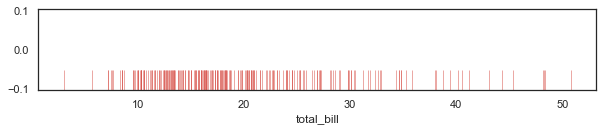

In [5]:
# Define plot layout
fig, ax = plt.subplots(figsize=(10, 1.5))

# Make the rugplot
sns.rugplot(ax = ax, x=tips['total_bill'], height=0.25, lw=0.5, color = sns.xkcd_rgb["pale red"]) ;

-----

While illustrative, this simple rug plot does not convey the necessary information in a clear and visually compelling manner. Before proceeding, we can make several changes to the plot to improve the presentation and emphasize the distribution of points more clearly. First, we remove the box and eliminate a y-axis, which is unnecessary for this one-dimensional plot. This is done by using both seaborn to trim the unused axes and by indicating there are no _tick_ marks for the y-axis, which is done by passing in an empty array to the `set_yticks` method. Finally, we annotate the plot appropriately. Please note that we use `ax.text()` to anotate the plot. This function print out a text at specified location in the plot. You may also try use `ax.set_title()` to set a title that always prints the title on top of the plot. We also employ the seaborn `despine` function to remove the top and right spines from the plot.

-----

In [6]:
help(sns.despine)

Help on function despine in module seaborn.utils:

despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
    Remove the top and right spines from plot(s).
    
    fig : matplotlib figure, optional
        Figure to despine all axes of, defaults to the current figure.
    ax : matplotlib axes, optional
        Specific axes object to despine. Ignored if fig is provided.
    top, right, left, bottom : boolean, optional
        If True, remove that spine.
    offset : int or dict, optional
        Absolute distance, in points, spines should be moved away
        from the axes (negative values move spines inward). A single value
        applies to all spines; a dict can be used to set offset values per
        side.
    trim : bool, optional
        If True, limit spines to the smallest and largest major tick
        on each non-despined axis.
    
    Returns
    -------
    None



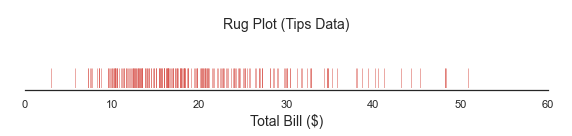

In [7]:
# Define plot layout
fig, ax = plt.subplots(figsize=(10, 1.5))

# Make the rugplot
sns.rugplot(ax = ax, x=tips['total_bill'], height=0.25, lw=0.5, c = sns.xkcd_rgb["pale red"])

# Remove y axis (by using empty array)
ax.set_yticks([])

# Set x-axis length and label
ax.set_xlim(-2, 62)
ax.set_xlabel('Total Bill (\$)', fontsize=14)

# Annotate the plot
ax.text(30, 0.05, 'Rug Plot (Tips Data)', ha='center', fontsize=14)  # 0.05 = sets the heigth of text from the figure

# Clean up plot appearance
sns.despine(ax=ax, left=True, offset=2, trim=True)

-----

We can also compare and contrast two data sets directly by plotting their rug plots together. This method is demonstrated below, where we compare the `total_bill` column in the _tips_ data set, distinguished by _lunch_ and _dinner_. In this case, we loop over the two data sets and repeat the plot functionality as needed. To display two rugplots on the same matplotlib figure, we have to change our plotting code slightly. First, we pass into the `subplots` function several extra parameters:

- `nrows`: the number of rows that will contain sub-plots,
- `ncols`: the number of columns that will contain sub-plots,
- `sharex`: whether the plots share the x-axis, and
- `sharey`: whether the plots share the y-axis.

Thus, if we wish to have two plots, one on top of the other sharing the same x-axis, we have the following functions call:

```python
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
```

The `axs` variable holds a Python `list` that contains the plot axes for each sub-plot. To change which set of axes are used for a given plot, we simply select the appropriate element from the list, which is shown in the code example below. Overall, this technique works for simple plot layouts.  We will cover more complex plot layouts in a subsequent module.

-----